## Noise Complaints - Spatial Anlaysis

### Concepts

## Spatial regression

### Weight Matrix

Now, once the neighor weights $w_{i,j}$ are selected for each pair of $i,j$ on a two- or multidimensional grid, consider an array of values $X_i$ corresponding to each cell $i$. Compute their sample mean and variance"
$$
\mu=\frac{\sum\limits_i X_i}{N},
$$$$
\sigma^2=\frac{\sum\limits_i (X_i-\mu)^2}{N}.
$$

Then one of the quantities, characterizing existing spatial autocorrelation - Moran I - could be defined as: 
$$
I=\frac{\sum\limits_{i,j}w_{i,j}(X_i-\mu)(X_j-\mu)}{\sigma^2\left(\sum\limits_{i,j}w_{i,j}\right)}
$$


2. assign weights $w_ij$ is by using a **K-nearest neighbor approach**: set $w_{i,j}=1$ if $j$ is one of the $k$ nearest neighbors of $i$ and $w_{i,j}=0$ - otherwise.

3. Alternatively instead of picking up several closest neighbors the weights $w_{i,j}$ might be assigned in a more homogenous manner depending on the distance between the two cells $i,j$. Specifically one can assing different real-valued weights for all of them in inverse proportion to the distance (or square distance) from the considered cell. Just need to normalize the weights making sure that for each cell the total weight of all neighbors is the same:
$$
w_{i,j}=\frac{d_{i,j}^{-q}}{\sum_{k\neq i} d_{i,k}^{-q}},
$$
where $q=1,2$ or other power.




### Spatial error regression

Consider an output variable $y$ being modelled by means of multi-dimensional input variable $x$.
Classical assumtptions of a linear regression
$$
y=w^T x + \varepsilon
$$
include the assumption that all the errors 
$$
\varepsilon_j=y_j-w^T x_j
$$
for all the observations $x_j, y_j$ are independant identically (normally) distributed random variables with zero mean and the same variance, i.e.
$$
\varepsilon_j\sim {\cal N}(0,\sigma^2)\hspace{3ex}(1)
$$
and
$$
\forall i\neq j,\ E[\varepsilon_i\varepsilon_j]=0.\hspace{3ex}(2)
$$

However when we're predicting variables in space, the above assumption often does not hold as the errors $\varepsilon$ might be spatially autocorrelated. Imagine a following example


So if for the available training dataset $Y,X$ and the estimate $y\sim w^T x$, the error vector
$$
\varepsilon=Y-X w
$$
demonstrates significant autocorrelation (say having Moran I way above $0$), the OLS regression estimate may not be consistent, as the assumptions of the OLS regression are violated.

Instead one could consider a regression with spatial correlated errors, called spatial error regression:
$$
Y=X w+u,\hspace{3ex}(3)
$$$$
u=\lambda W u+\varepsilon,\hspace{3ex}(4)
$$
where components of $\varepsilon$ are independent normally distributed random variables following conditions (1)-(2), while error term $u$ admits spatial autocorrelation, controlled by the term $\lambda W u$, where $W$ as before is the given spatial lag matrix, defining arbitrary weights of neighbor relations and the constant $\lambda$ is responsible for the strength of the spatial autocorrelation. 

As OLS estimate for the above regression does not make much sense as $u$ does not follow (1)-(2), so we need to get back to its origins, considering max-likelihood approach with respect to the conditions (1)-(2) for $\varepsilon$.

One can rewrite (3)-(4) as
$$
Y=X w +(I_N-\lambda W)^{-1}\varepsilon,
$$
where $N$ is the size of the training sample and $I_N$ is the identity $N\times N$ matrix. The the log-likelihood of getting the observed $Y$ out of $X$ can be written as
$$
L=\sum\limits_j ln (1-\lambda \omega_j)-\frac{N}{2}ln(2\pi)-N ln \sigma-\frac{(Y-X w)'(Y-\lambda W Y)'(Y-X w)}{2\sigma^2},
$$
where $\omega_j$ are eigenvalues of $W$. Now finding the unknown parameters $\lambda$ and $w$ is subject to solving the optimization problem $L\to\max$.


#### Spatial Lag  
Similarity of CT neighbors can be meseard by means of spatial lag as follow:
$$ComplaintNormCountLag = \sum_j w_{i,j} ComplaintNormCount$$

### Spatial lag regression
An alternative option is to account for the spatial autocorrelation first, directly for the output variable:
$$
Y=\rho W Y + X \beta+\varepsilon. (5)
$$
This way we can keep classic assumptions (1)-(2) for the errors $\varepsilon_j$ considering them independent, as the correlations are already taken care of. This model is callse spatial lag regression. The log-likelihood for it will take form:
$$
L=\sum\limits_j ln (1-\rho \omega_j)-\frac{N}{2}ln(2\pi)-N ln \sigma-\frac{(Y-\rho W Y-X w)'(Y-\rho W Y-X w)}{2\sigma^2}.
$$
Again estimates for $\rho$ and $w$ are now subject to maximizing $L\to\max$. In case $\rho$ is fixed, after dropping constants this problem start being pretty similar to OLS:
$$
N ln \sigma+\frac{\sum_j \varepsilon_j^2}{2\sigma^2}\to\min.
$$
However, worth mentioning that $\sum_j \varepsilon_j^2$ is no longer connected with $R^2$ as $\varepsilon$ are not the errors for $Y$ but for the lagged variable $Y-\rho WY$. Also the general case when we need to tune $\rho$ is more sophisticated. 


the notebook which contains all the merging is here:  merge_features_complaints

the column name 'counts' = count of complaints
there's also a column which normalizes the count of complaints by population

all_data.csv = all of the data by census tract
hour_data.csv = complaints by census tract by hour
month_data.csv = complaints by census tract by month

In [127]:
import numpy as np
import pysal as ps
from geopandas import GeoDataFrame
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.stats.api import ols
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
from matplotlib.pyplot import *
import random

In [7]:
# load files
df_complaints = pd.read_csv('../output/all_data.csv')

In [28]:
df_complaints.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
df_complaints.head(3)

,BoroCT2010,counts,BldgAge,NumFloors,AssessTot,ComArea,NumBldgs,white_pop,black_pop,asian_pop,tworaces_pop,hisplat_pop,female_pop,elderly_pop,median_hh_inc,BldgDepthbyFront,allother_race_pop,comps_perperson
0,1000201,725.0,104.861111,5.444444,2.597126e+06,0.431231,1.166667,0.113221,0.041562,0.341455,0.007166,0.251881,0.533859,0.210319,7.352562,4926.061449,0.150125,0.259764
1,1000202,2264.0,87.530612,5.862245,7.336789e+06,0.703564,3.673469,0.166967,0.123198,0.231720,0.024073,0.239959,0.573378,0.205458,3.821318,8921.366638,0.101828,0.291452
2,1000600,1626.0,92.378205,5.410256,2.117196e+06,0.312833,1.153846,0.031464,0.033296,0.425522,0.004301,0.211725,0.524773,0.236498,1.582205,2682.086887,0.173172,0.129520


In [31]:
# load shape file 
nyc_shape = GeoDataFrame.from_file('../data/nyct2010_17a')     #ps.examples.get_path("columbus.shp"))

In [32]:
nyc_shape.head(2)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((994133.507019043 214848.8975830078, ..."


In [33]:
nyc_shape['BoroCT2010'] = nyc_shape['BoroCT2010'].apply(float)

In [34]:
# merge counts by zipcode and shapefile
ct_counts = pd.merge(nyc_shape[['BoroCT2010', 'geometry']], df_complaints, left_on='BoroCT2010', right_on='BoroCT2010')

In [35]:
ct_counts.shape

(2101, 19)

In [36]:
ct_counts.head(3)

,BoroCT2010,geometry,counts,BldgAge,NumFloors,AssessTot,ComArea,NumBldgs,white_pop,black_pop,asian_pop,tworaces_pop,hisplat_pop,female_pop,elderly_pop,median_hh_inc,BldgDepthbyFront,allother_race_pop,comps_perperson
0,5000900.0,"POLYGON ((962269.1260375977 173705.5001831055,...",421.0,80.536313,2.353380,1.272389e+05,0.315911,1.198324,0.124194,0.263441,0.032796,0.020430,0.136022,0.484946,0.059140,28.225806,1028.054570,0.073656,0.226344
1,1009800.0,"POLYGON ((994133.507019043 214848.8975830078, ...",2814.0,96.623794,6.585209,3.398692e+06,0.393859,1.106109,0.670368,0.016854,0.131043,0.011759,0.028351,0.508231,0.182519,15.982623,2341.444145,0.009146,0.367651
2,1010000.0,"POLYGON ((993108.3057861328 216013.1307983398,...",870.0,74.400000,14.668750,3.480757e+07,0.917437,1.012500,0.686275,0.010101,0.066548,0.013666,0.096257,0.557932,0.146762,66.606061,6497.351916,0.032680,0.516934


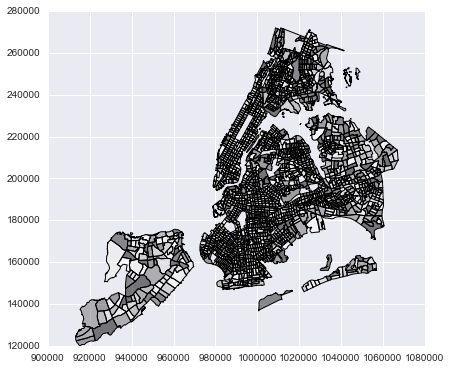

In [50]:
ct_counts.plot()

In [169]:


## Scale transforming
def scale_variables(df_X, columns=None):
    if columns:
        X_unchanged = df_X.loc[:, df_X.columns[~df_X.columns.isin(columns)]]
        
        if len(columns) == 1:
        # scale X
            scaler = preprocessing.StandardScaler().fit(df_X[columns[0]].values.reshape(-1,1))
            X_p = scaler.transform(df_X[columns[0]].values.reshape(-1,1))
            X_std = np.hstack((X_p, X_unchanged))

        else:
            scaler = preprocessing.StandardScaler().fit(df_X.loc[:, columns])
            X_p = scaler.transform(df_X.loc[:, columns])
            X_std = np.hstack((X_p, X_unchanged))
    else:
        scaler = preprocessing.StandardScaler().fit(df_X)
        X_std = scaler.transform(df_X)  
        
    return X_std

In [174]:
ct_counts.shape

(2101, 19)

In [190]:
## Scale feature with Large values
from sklearn.preprocessing import MinMaxScaler

In [170]:
ct_counts.head(2)

,BoroCT2010,geometry,counts,BldgAge,NumFloors,AssessTot,ComArea,NumBldgs,white_pop,black_pop,asian_pop,tworaces_pop,hisplat_pop,female_pop,elderly_pop,median_hh_inc,BldgDepthbyFront,allother_race_pop,comps_perperson
0,5000900.0,"POLYGON ((962269.1260375977 173705.5001831055,...",421.0,80.536313,2.353380,1.272389e+05,0.315911,1.198324,0.124194,0.263441,0.032796,0.020430,0.136022,0.484946,0.059140,28.225806,1028.054570,0.073656,0.226344
1,1009800.0,"POLYGON ((994133.507019043 214848.8975830078, ...",2814.0,96.623794,6.585209,3.398692e+06,0.393859,1.106109,0.670368,0.016854,0.131043,0.011759,0.028351,0.508231,0.182519,15.982623,2341.444145,0.009146,0.367651


In [177]:
columns_to_scale = ['BldgAge','NumFloors', 'AssessTot', 'NumBldgs', 'median_hh_inc', 'BldgDepthbyFront']

In [191]:
## Scale
scaler = MinMaxScaler()

ct_counts.loc[:, columns_to_scale] = scaler.fit_transform(ct_counts.loc[:, columns_to_scale])

In [193]:
ct_counts.head(3)

,BoroCT2010,geometry,counts,BldgAge,NumFloors,AssessTot,ComArea,NumBldgs,white_pop,black_pop,asian_pop,tworaces_pop,hisplat_pop,female_pop,elderly_pop,median_hh_inc,BldgDepthbyFront,allother_race_pop,comps_perperson
0,5000900.0,"POLYGON ((962269.1260375977 173705.5001831055,...",421.0,0.609441,0.048364,0.001207,0.315911,0.000516,0.124194,0.263441,0.032796,0.020430,0.136022,0.484946,0.059140,0.024117,0.001970,0.073656,0.226344
1,1009800.0,"POLYGON ((994133.507019043 214848.8975830078, ...",2814.0,0.746490,0.214979,0.037257,0.393859,0.000296,0.670368,0.016854,0.131043,0.011759,0.028351,0.508231,0.182519,0.013072,0.004486,0.009146,0.367651
2,1010000.0,"POLYGON ((993108.3057861328 216013.1307983398,...",870.0,0.557166,0.533243,0.383368,0.917437,0.000073,0.686275,0.010101,0.066548,0.013666,0.096257,0.557932,0.146762,0.058743,0.012448,0.032680,0.516934


In [194]:
## Save as shapefile
ct_counts.to_file('../output/scaled_merged_features_shapefile')


______________

In [203]:
#Visualize the location as points
# y 
def gen_plot_nyc(y, cmap):
    import shapefile as shp
    #read shape_files
    sf_nyc = shp.Reader("../output/scaled_merged_features_shapefile/scaled_merged_features_shapefile.shp")
    shapes_nyc=sf_nyc.shapes()
    records_nyc=sf_nyc.records()
    
    shape_points_nyc=[]
    for i in range(len(shapes_nyc)):
        shape_points_nyc.append(shapes_nyc[i].points[0]) #get points from shapefile
    temp=pd.DataFrame(shape_points_nyc)
    import matplotlib.pyplot as plt
    plt.scatter(list(temp.loc[:, 0]), list(temp.loc[:, 1]), c=y,cmap=cmap, s=50)
    plt.colorbar();
    
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')

In [204]:
#Let's calculate R2 for these three models over the entire sample:
#w_type: 1)knn_3,2)knn_5 3)Rook, 4) Queen 

def R_2_test_Ols_Err_Lag(y,X,shp_link,w_type):
    
    #import statsmodels.api as sm
    #result_ols=sm.OLS(y.reshape(1,len(X))[0],pd.DataFrame(X)).fit() # y, x        
    #R_2_is_ols=result_ols.rsquared
    #print("(IS) R2 for OLS is: {}".format(R_2_is_ols))

    # ############################################################################ 
    
    if w_type==1:
        w = ps.knnW_from_shapefile(shp_link, k=3)
    elif w_type==2:
        w = ps.knnW_from_shapefile(shp_link, k=5)
    elif w_type==3:
        w=ps.rook_from_shapefile(shp_link)
    elif w_type==4:
        w=ps.queen_from_shapefile(shp_link)
    
    #################################################
    #Spatial OLS model.
    result_ols = ps.spreg.ols.OLS(y,X,w=w)
    
    # IS
    d = result_ols.predy.reshape(1,len(result_ols.predy))[0]
    error= d-y.reshape(1,len(X))[0]
    R_2_is_ols=1-error.var()/y.reshape(1,len(X))[0].var()
    
    print("(IS) R2 for Spatial OLS is: {}".format(R_2_is_ols))
    
    #################################################
    #Spatial Error model:y=Xb+(I-lambda*W)^-1 v  . So we only need coefficient to calculate y.
    result_err= ps.spreg.ML_Error(y,X,w=w) 

    a=np.array(X)
    b=result_err.betas.reshape(1,len(result_err.betas))[0]

    #IS
    d=result_err.predy.reshape(1,len(result_err.predy))[0]
    error=d-y.reshape(1,len(X))[0]
    R_2_is_err=1-error.var()/y.reshape(1,len(X))[0].var()

    print("(IS)R2 for SEM is: {};".format(R_2_is_err))

    ##################################################################################
    #Spatial Lag model. y=(1-lambda*W)^(-1)(Xb+c)
    result_lag= ps.spreg.ML_Lag(y,X,w=w) 


    #IS
    d=result_lag.predy.reshape(1,len(result_lag.predy))[0]
    error=d-y.reshape(1,len(X))[0]
    R_2_is_lag=1-error.var()/y.reshape(1,len(X))[0].var()

    print("(IS)R2 for SLM is: {}".format(R_2_is_lag))

## Shape links

In [222]:
shpfile_link = '../output/scaled_merged_features_shapefile'
dbf_link = '../output/scaled_merged_features_shapefile/scaled_merged_features_shapefile.dbf'
shp_link = '../output/scaled_merged_features_shapefile/scaled_merged_features_shapefile.shp'

## Spatial Weights Matrix

In [206]:
#Read attributes:
db =  ps.open((dbf_link),'r')
ds_name = "scaled_merged_features_shapefile.dbf"
y_name = "comps_perp" # noise complaint counts per person: comps_perp

#Dependent variable:
y = np.array(db.by_col(y_name)).T
y.shape = (len(y),1)

#Variables: 
x_names = ['BldgAge','NumFloors','AssessTot','ComArea','NumBldgs',\
           'white_pop','black_pop','asian_pop','tworaces_p','hisplat_po','female_pop','elderly_po',\
           'median_hh_','BldgDepthb', 'allother_r']

x = np.array([db.by_col(var) for var in x_names]).T

In [207]:
#Step one: Define w matrix.
#Since our shapefile are all points here, so we can only use K-nearest neighbors.(Rook, Queen, Bishop do not work here)

w_knn3_nyc = ps.knnW_from_shapefile(shp_link, k=3)
w_knn5_nyc = ps.knnW_from_shapefile(shp_link, k=5)                                

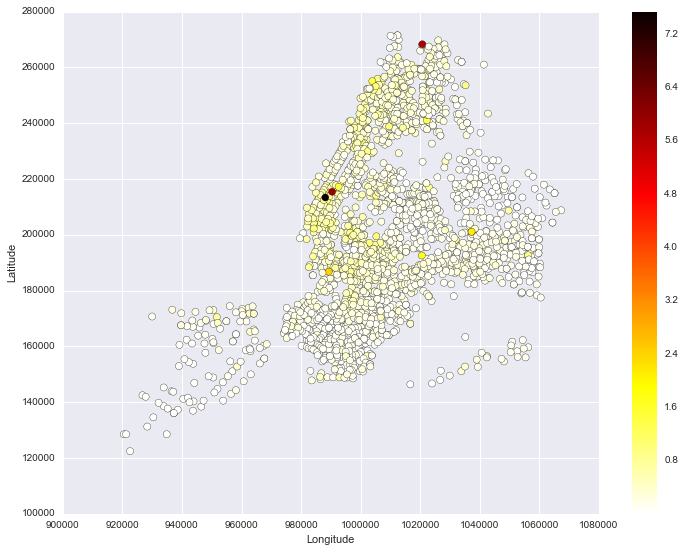

In [220]:
gen_plot_nyc(y.reshape(1,len(y)), cmap='hot_r')

In [225]:
ct_counts_scaled = GeoDataFrame.from_file(shpfile_link)

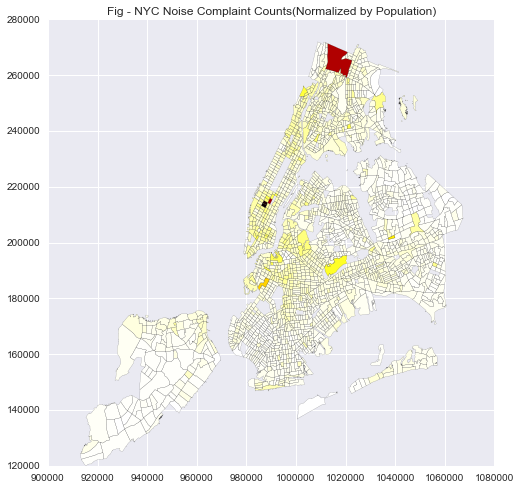

In [228]:
f, ax = plt.subplots(figsize=(8,8))
ct_counts_scaled.plot(column='comps_perp',cmap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Fig - NYC Noise Complaint Counts(Normalized by Population)")

# Spatial Autocorrelation

**Distance Based **: 
KNN-5 Weights -- 5 nearest polygons defines as neighbors 

**Contiguity based**: 
Queen Weights -- Queen contiguity defines as neighbors any pair of polygons that share at
least one vertex in their polygon definitions

In [229]:
## Using w_knn5_nyc
k5W_CT = w_knn5_nyc

## Using Queens
#qW_CT=ps.queen_from_shapefile(path)

In [230]:
k5W_CT[10]

{1037: 1.0, 1965: 1.0, 1966: 1.0, 2070: 1.0, 2084: 1.0}

In [267]:
Wmatrix, ids = k5W_CT.full()

In [268]:
Wmatrix

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.2, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0.2,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0.2],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.2,  0. ]])

#### Change the matrix to be row-standardized

In [ ]:
k5W_CT.transform = 'r'

### Spatial Lag  
Similarity of CT neighbors can be meseard by means of spatial lag as follow:
$$ComplaintNormCountLag = \sum_j w_{i,j} ComplaintNormCount$$

In [231]:
normCount = ct_counts_scaled['comps_perp']
normCountLag=ps.lag_spatial(k5W_CT, normCount)

#### Create Quantiles for maping

In [233]:
normCountLagQ10 = ps.Quantiles(normCountLag, k=10)
normCountLagQ10

                Quantiles                
 
Lower            Upper              Count
         x[i] <=  0.414               211
 0.414 < x[i] <=  0.573               210
 0.573 < x[i] <=  0.714               210
 0.714 < x[i] <=  0.829               210
 0.829 < x[i] <=  0.948               210
 0.948 < x[i] <=  1.142               210
 1.142 < x[i] <=  1.399               210
 1.399 < x[i] <=  1.717               210
 1.717 < x[i] <=  2.273               210
 2.273 < x[i] <= 22.166               210

### Map Normalized Counts Lag

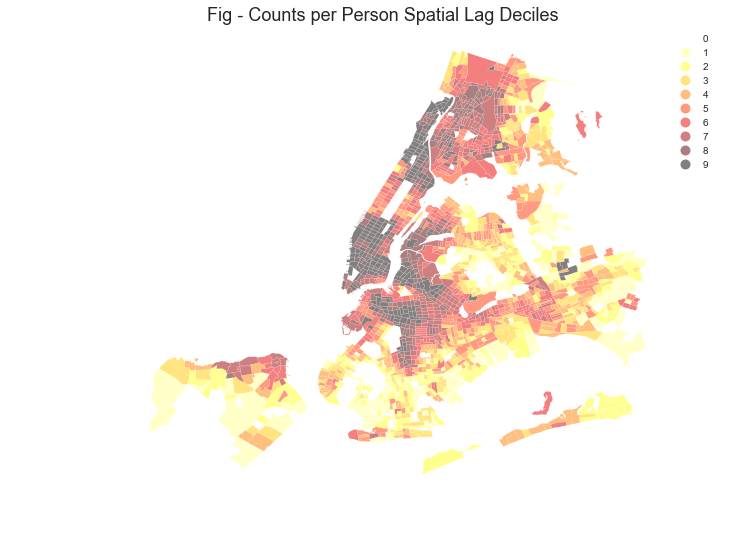

In [236]:
f, ax = plt.subplots(figsize=(12, 9))
ct_counts_scaled.assign(cl=normCountLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()

plt.title("Fig - Counts per Person Spatial Lag Deciles", size=18)

**Figure**: The map shows the study area that is colored based on 10 quantiles of **counts per person** spatial lag. Darker color indicates more counts of the spatial lag quantile.

In [242]:
b,a = np.polyfit(normCount, normCountLag, 1)
b,a 

(1.810439205479822, 0.78760820103272178)

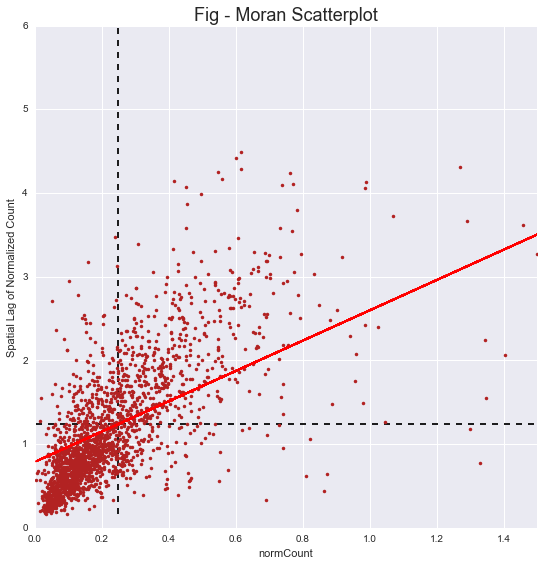

In [244]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(normCount, normCountLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(normCount.mean(), normCountLag.min(), normCountLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(normCountLag.mean(), normCount.min(), normCount.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(normCount, a + b*normCount, 'r')

plt.ylim(0, 6)
plt.xlim(0, 1.5)
plt.title('Fig - Moran I Scatterplot', size=18)
plt.ylabel('Spatial Lag of Normalized Count')
plt.xlabel('normCount')

**Figure**: The map shows the correlation between normalied counts and normalied count spatial lag with a fitted line.
The dotted PCI lines divide the areas into four where the top right area contains the **hot spot** data points and bottom left are **cold spot** data points.

## Moran'I

In [245]:
I_normCount = ps.Moran(normCount, k5W_CT)

In [246]:
I_normCount.I, I_normCount.p_sim

(0.36208784109596426, 0.001)

In [247]:
I_normCount.sim[0:10]

array([ 0.01229326,  0.00340038, -0.01264511, -0.01023573, -0.00941762,
       -0.0130912 ,  0.01221631, -0.00467121, -0.01307184, -0.00082578])

## Local Moran - Lisa

In [249]:
LMo_normCount = ps.Moran_Local(normCount, k5W_CT, permutations=999)

In [250]:
# p_sim: p-values based on permutations (one-sided)
LMo_normCount.Is[0:5], LMo_normCount.p_sim[0:5]

(array([ -1.32501827e-02,   2.64124767e-02,   8.05989344e-01,
          5.24229947e+00,   1.73138219e+02]),
 array([ 0.155,  0.28 ,  0.016,  0.011,  0.001]))

## Hot and Cold Spot

## Lisa

In [255]:
sig = LMo_normCount.p_sim < 0.05
hotspots = LMo_normCount.q==1 * sig
coldspots = LMo_normCount.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 236
Number of Coldspots: 424


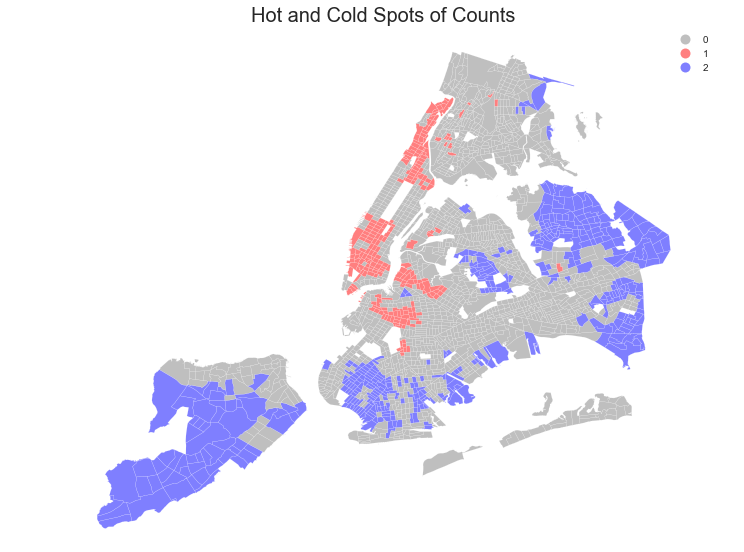

In [262]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots * 1 + coldspots * 2

f, ax = plt.subplots(figsize=(12, 9))
ct_counts_scaled.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Hot and Cold Spots of Counts", size=20)
plt.legend(fontsize='x-large')


**Figure**: The heat maps show the hot spots and cold spots of noise complaint counts(normalized by population) based on Moran's I Statistics(Local), indicated by the red and blue colored regions. Auto-correlation occurs between the Counts within a census tract and its neighbour tracts(neighbours are weighted). 

The cluster of red regions indicates that the tracts with high complaint counts are likely to have adjacent tracts also having high number of complaints; the cluster of blue regions shows that the tracts with number of complaints are more likely to have low counts in neighbour tracts.

# Spatial Models

## Spatial OLS - (Ordinary Least Square)

In [264]:
#Step two: run OLS and diagnostics report.
res_ols_nyc =ps.spreg.ols.OLS(y,x,w=w_knn3_nyc,name_y=y_name,name_x=x_names,name_w='knn5',\
                              name_ds=ds_name,spat_diag=True,moran=True) 
print res_ols_nyc.summary

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :scaled_merged_features_shapefile.dbf
Weights matrix      :        knn5
Dependent Variable  :  comps_perp                Number of Observations:        2101
Mean dependent var  :      0.2474                Number of Variables   :          16
S.D. dependent var  :      0.3465                Degrees of Freedom    :        2085
R-squared           :      0.4992
Adjusted R-squared  :      0.4956
Sum squared residual:     126.254                F-statistic           :    138.5472
Sigma-square        :       0.061                Prob(F-statistic)     :  2.048e-299
S.E. of regression  :       0.246                Log likelihood        :     -27.321
Sigma-square ML     :       0.060                Akaike info criterion :      86.641
S.E of regression ML:      0.2451                Schwarz criterion     :     177.044

-----------------------------------------------------

In [211]:
res_ols_nyc.u

array([[-0.03660813],
       [-0.01036001],
       [-0.24917184],
       ..., 
       [-0.00135094],
       [ 0.05552684],
       [ 0.06751211]])

The result of Moran's I we get is 0.246903850091, and p norm is:2.71786771858e-50. So we should accept that we have spatial autocorelation(but not that strong).


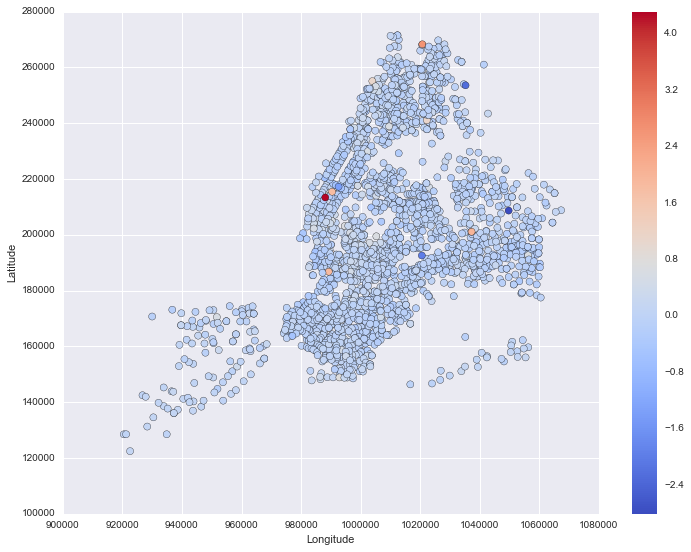

In [265]:
#Let's plot our residuals on plot.(Actually we did this above, maybe no need to show it again?)
gen_plot_nyc(res_ols_nyc.u,  cmap='coolwarm')
# The result of Moran's I on Spatial Autocorelation.
print "The result of Moran's I we get is {}, and p norm is:{}. So we should accept that we have spatial autocorelation(but not that strong).".format(
    res_ols_nyc.moran_res[0],res_ols_nyc.moran_res[2])

## Spatial Lag


In [213]:
#(1) Spatial lag model:
res_slag_nyc =ps.spreg.ML_Lag(y,x,w=w_knn3_nyc,name_y=y_name,name_x=x_names,name_w='knn3',name_ds=ds_name) 
print res_slag_nyc.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :scaled_merged_features_shapefile.dbf
Weights matrix      :        knn3
Dependent Variable  :  comps_perp                Number of Observations:        2101
Mean dependent var  :      0.2474                Number of Variables   :          17
S.D. dependent var  :      0.3465                Degrees of Freedom    :        2084
Pseudo R-squared    :      0.5680
Spatial Pseudo R-squared:  0.5166
Sigma-square ML     :       0.052                Log likelihood        :      95.263
S.E of regression   :       0.228                Akaike info criterion :    -156.526
                                                 Schwarz criterion     :     -60.473

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----

## Spatial Error

In [214]:
#Spatial Error model:
res_error_nyc =ps.spreg.ML_Error(y,x,w=w_knn3_nyc,name_y=y_name,name_x=x_names,name_w='knn3',name_ds=ds_name) 
print res_error_nyc.summary

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :scaled_merged_features_shapefile.dbf
Weights matrix      :        knn3
Dependent Variable  :  comps_perp                Number of Observations:        2101
Mean dependent var  :      0.2474                Number of Variables   :          16
S.D. dependent var  :      0.3465                Degrees of Freedom    :        2085
Pseudo R-squared    :      0.4939
Sigma-square ML     :       0.052                Log likelihood        :      77.646
S.E of regression   :       0.228                Akaike info criterion :    -123.292
                                                 Schwarz criterion     :     -32.890

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------

In [215]:
#Compare coefficients
compare_coef=pd.DataFrame([list(res_ols_nyc.betas),
                          list(res_slag_nyc.betas)[:-1],
                         list(res_error_nyc.betas[:-1])]).T
                        
compare_coef.columns=['OLS','Spatial Lag','Spatial Error']
compare_coef.index=['Const']+x_names
compare_coef

,OLS,Spatial Lag,Spatial Error
Const,[-0.630717988985],[-0.569461144389],[-0.683872434204]
BldgAge,[0.268932985031],[0.183627250865],[0.295650260288]
NumFloors,[1.18440015488],[0.825913123451],[1.0180901055]
AssessTot,[-0.912423688651],[-0.825051547784],[-0.823451653945]
ComArea,[0.202686475575],[0.134031595993],[0.144461431037]
NumBldgs,[-0.00239022880138],[0.0463406118204],[0.00765254246702]
white_pop,[0.509042888158],[0.335872109453],[0.398027043266]
black_pop,[0.656432530091],[0.432605151681],[0.541271994903]
asian_pop,[0.486082825928],[0.341119958216],[0.40919408422]
tworaces_p,[0.572755951177],[0.139346441968],[-0.201168222533]


## Model Performance on Trainint Set (Whole dataset)

In [216]:
#IS R2
#IS test on the whole sample
shp_link='../output/merged_features_shapefile/merged_features_shapefile.shp'

w_type = ['k-3', 'k-5', 'rook', 'queen']

for i in range(1,5):
    print w_type[i-1]
    try:
        R_2_test_Ols_Err_Lag(y,x,shp_link,w_type=i)
    except:
        continue       

k-3
(IS) R2 for Spatial OLS is: 0.499184214615
(IS)R2 for SEM is: 0.491724805053;
(IS)R2 for SLM is: 0.567605842424
k-5
(IS) R2 for Spatial OLS is: 0.499184214615
(IS)R2 for SEM is: 0.421758011772;
(IS)R2 for SLM is: 0.569617418866
rook
('Island ids: ', [659, 1267, 1744])
(IS) R2 for Spatial OLS is: 0.499184214615
(IS)R2 for SEM is: 0.491380955742;
(IS)R2 for SLM is: 0.551038496378
queen
('Island ids: ', [659, 1267, 1744])
(IS) R2 for Spatial OLS is: 0.499184214615
(IS)R2 for SEM is: 0.484102889417;
(IS)R2 for SLM is: 0.566359092102


## Optimal weight method: k-5
## Optimal model: Spatial Lag Model
## R^2 : 0.569617418866
___________

In [217]:
## Plot best model result
res_slag_nyc.u

array([[-0.06093365],
       [ 0.03117199],
       [-0.09139007],
       ..., 
       [ 0.00583406],
       [ 0.04875976],
       [ 0.04516447]])

In [218]:
compare_coef['Spatial Lag']

Const         [-0.569461144389]
BldgAge        [0.183627250865]
NumFloors      [0.825913123451]
AssessTot     [-0.825051547784]
ComArea        [0.134031595993]
NumBldgs      [0.0463406118204]
white_pop      [0.335872109453]
black_pop      [0.432605151681]
asian_pop      [0.341119958216]
tworaces_p     [0.139346441968]
hisplat_po     [0.559450516299]
female_pop     [0.521674638553]
elderly_po    [-0.829447850512]
median_hh_      [3.93857552279]
BldgDepthb    [-0.156880299965]
allother_r     [0.181418273962]
Name: Spatial Lag, dtype: object

## Model Performance on Test Set 

In [ ]:
# implementation of the out-of-sample test for OLS and spatial regression models
def os_test(X,y,shp_link,ts=0.2,w_type=1):
    
    test=int(len(X)*ts)
   
    X_test=X[:test]
    X_train=X[test:]
    Y_test=y[:test]
    Y_train=y[test:]
    


    #We need to cut our shapefile to training part and testing part as well. (Since all the regressions here are related to shapefile)
    import shapefile as shp
    sf = shp.Reader(shp_link)
    shapes=sf.shapes()
    records=sf.records()

    #write fields
    w_test=shp.Writer(sf.shapeType)
    w_train=shp.Writer(sf.shapeType)

    w_test.fields=sf.fields
    w_train.fields=sf.fields

    t=0

    #!!!y is not unique
    for i in range(len(X)):
        if list(X[i]) in np.ndarray.tolist(X_test):
            #write shape
            w_test.poly([shapes[i].points])
            #write features
            w_test.record(*records[i])
        else:
            w_train.poly([shapes[i].points])
            w_train.record(*records[i])

    w_train.save("temp/train")
    w_test.save("temp/test")

    #OLS
    from pandas.stats.api import ols

    result_ols=ols(y=Y_train.reshape(1,len(X_train))[0],x=pd.DataFrame(X_train))

    a=np.array(X_test)
    b=np.array(result_ols.beta)
    try:
        c=np.sum(a*b[0:-1],axis=1)+b[-1]
    except ValueError:
        c=a*b[0:-1]+b[-1]

    error=Y_test.reshape(1,len(X_test))[0]-c
    R_2_os_ols=1-error.var()/Y_test.reshape(1,len(X_test))[0].var()
    R_2_is_ols=result_ols.r2
    print("IS R2 for OLS is: {}; OS R2 for OLS is: {}".format(R_2_is_ols,R_2_os_ols))

    # ############################################################################
    #Spatial Error model:y=Xb+(I-lambda*W)^-1 v  . So we only need coefficient to calculate y. This situation is simple.

    if w_type==1:
        w = ps.knnW_from_shapefile("temp/train.shp", k=3)
    elif w_type==2:
        w = ps.knnW_from_shapefile("temp/train.shp", k=5)
    elif w_type==3:
        w=ps.rook_from_shapefile("temp/train.shp")
    elif w_type==4:
        w=ps.queen_from_shapefile("temp/train.shp")
    
    result_err= ps.spreg.ML_Error(Y_train,X_train,w=w) 


    a=np.array(X_test)
    b=result_err.betas.reshape(1,len(result_err.betas))[0]
    #OS
    try:
        c=np.sum(a*b[1:-1],axis=1)+b[0]
    except ValueError:
        c=a*b[1:-1]+b[0]
    error=Y_test.reshape(1,len(X_test))[0]-c
    R_2_os_err=1-error.var()/Y_test.reshape(1,len(X_test))[0].var()

    #IS

    d=result_err.predy.reshape(1,len(result_err.predy))[0]
    error=d-Y_train.reshape(1,len(X_train))[0]
    R_2_is_err=1-error.var()/Y_train.reshape(1,len(X_train))[0].var()

    print("IS R2 for SEM is: {}; OS R2 for SEM is:{}".format(R_2_is_err,R_2_os_err))

    ##################################################################################
    #Spatial Lag model. y=(1-lambda*W)^(-1)(Xb+c)
    result_lag= ps.spreg.ML_Lag(Y_train,X_train,w=w) 

    a=np.array(X_test)  #a is X
    b=result_err.betas.reshape(1,len(result_err.betas))[0] #b is b
    #OS
    try:
        c=np.sum(a*b[1:-1],axis=1)+b[0]
    except ValueError:
        c=a*b[1:-1]+b[0]  #c is Xb+c

    # Now let's calculate (1-lambda*W)^-1
    #get new w:
    w_temp=ps.knnW_from_shapefile("temp/test.shp", k=3)

    t=np.linalg.inv((np.identity(len(w_temp.full()[0]))-w_temp.full()[0]*b[-1]))

    #Now calculate y.
    d=np.dot(t,c)

    error=Y_test.reshape(1,len(X_test))[0]-d
    R_2_os_lag=1-error.var()/Y_test.reshape(1,len(X_test))[0].var()

    #IS
    d=result_lag.predy.reshape(1,len(result_lag.predy))[0]
    error=d-Y_train.reshape(1,len(X_train))[0]
    R_2_is_lag=1-error.var()/Y_train.reshape(1,len(X_train))[0].var()

    print("IS R2 for SLM is: {}; OS R2 for SLM is:{}".format(R_2_is_lag,R_2_os_lag))

In [ ]:
#OS R2
shp_link=ps.examples.get_path("baltim.shp")
print "k3"
os_test(x,y,shp_link,ts=0.3,w_type=1)
print "\nk5"
os_test(x,y,shp_link,ts=0.3,w_type=2)